## Distance Map Generation

This notebook is to add a distance map for each image label (`.mat` format).

The only thing you need to do, is to set up the `img_dir` and `ann_dir`.

In [1]:
import glob
import os

import scipy.io as sio

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage.morphology import distance_transform_edt


In [2]:
img_ext = '.png'
img_dir = 'data/Valid/Images/'
ann_dir = 'data/Valid/Labels/'
####

file_list = glob.glob('%s/*%s' % (img_dir, img_ext))
file_list.sort()

In [3]:
for filename in tqdm(file_list):
    filename = os.path.basename(filename)
    basename = filename.split('.')[0]
    #print(filename)

    img = cv2.imread(img_dir + basename + img_ext)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    labels = sio.loadmat(ann_dir + basename + '.mat')
    ann_inst = labels['instance_map'] 
    #     labels['positive_map'] = labels['positive_map'][...,0] 
    #     labels['negative_map'] = labels['negative_map'][...,0] 
    inst_list = list(np.unique(ann_inst))[1:]
    dist_map = np.zeros_like(ann_inst, dtype='float')
    for inst_id in inst_list:
        mask = ann_inst.copy()
        mask[mask!=inst_id] = 0
        mask[mask!=0] = 1
        fg_dist = distance_transform_edt(mask)

        v_max = fg_dist[ann_inst == inst_id].max()
        v_min = fg_dist[ann_inst == inst_id].min()
        dist_map[ann_inst == inst_id] = 0.9*(fg_dist[ann_inst == inst_id]-v_min)/(v_max-v_min) + 0.1
    labels['marker_map'] = dist_map
    
    sio.savemat(ann_dir + basename + '.mat', labels)

100%|██████████| 100/100 [02:29<00:00,  1.50s/it]


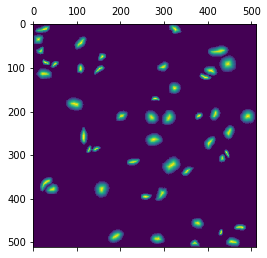

In [4]:
plt.matshow(labels['marker_map'])